# M8 Assignment
## Student Name: Hiep Vo Dang
---

## Part 1: Data Summary

#### 1.1. Explain how many use cases your data set provides; how many attributes are in each use case

Based on the data description at https://ggplot2.tidyverse.org/reference/diamonds.html, We can see that each of the 10 variables can serve as features for different use cases. I'll outline some potential use cases and their relevant attributes:

- <b>Price Prediction</b><br><i>Attributes</i>: `carat`, `cut`, `color`, `clarity`, `x`, `y`, `z`, `depth`, `table`<br><i>Description:</i> Using the attributes to predict the price of a diamond. This is a regression problem where all the features contribute to determining the diamond's price.

- <b>Cut Quality Classification</b><br><i>Attributes:</i> `price`, `carat`, `color`, `clarity`, `x`, `y`, `z`, `depth`, `table`<br><i>Description:</i> Classifying the cut quality of a diamond. This is a classification problem where the other features could be used to predict the cut quality.

- <b>Clarity Classification</b><br><i>Attributes:</i> `price`, `carat`, `cut`, `color`, `x`, `y`, `z`, `depth`, `table`<br><i>Description:</i> Predicting the clarity of a diamond, which is also a classification problem.

- <b>Market Segmentation</b><br><i>Attributes:</i> `price`, `carat`, `cut`, `color`, `clarity`, `x`, `y`, `z`, `depth`, `table`<br><i>Description:</i> Segmenting diamonds into different market groups for targeted marketing. This could be a clustering task.

- <b>Anomaly Detection</b><br><i>Attributes:</i> `price`, `carat`, `cut`, `color`, `clarity`, `x`, `y`, `z`, `depth`, `table`<br><i>Description:</i> Identifying diamonds that have unusual attributes which could be errors.

#### 1.2. What the data types are for each of the attributes?

The data type of each attribute is as followed:

- `price`       : numerical
- `carat`       : numerical
- `cut`         : ordinal categorical (worst to best: Fair, Good, Very Good, Premium, Ideal)
- `color`       : oridnal categorical (worst to best: J, I, H, G, F, E, D)
- `clarity`     : oridnal categorical (worst to best: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF)
- `x`           : numerical
- `y`           : numerical
- `z`           : numerical
- `depth`       : numerical
- `table`       : numerical

In [1]:
# Import libraries:
import pandas as pd

# Read the data from remote Github repository:
diamonds = pd.read_csv(
    r'https://raw.githubusercontent.com/dangvohiep/diamonds/master/diamonds.csv',
    usecols=range(1,11),    # skip the index column
    dtype={
        'price'     : float,
        'carat'     : float,
        'cut'       : object,
        'color'     : object,
        'clarity'   : object,
        'x'         : float,
        'y'         : float,
        'z'         : float,
        'depth'     : float,
        'table'     : float,
    }
)

#### 1.3. Data summary

<b>Check for missing values:</b>

In [2]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


As we can see, there is no missing values in the dataset

<b>Check for numerical range:</b>

In [3]:
numerical_variables = diamonds.select_dtypes(include=float)
numerical_variables.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<b>Check for categorical frequency:</b>

In [4]:
categorical_variables = diamonds.select_dtypes(include=object)

In [5]:
# Attribute `cut`:
categorical_variables['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [6]:
# Attribute `color`:
categorical_variables['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [7]:
# Attribute `clarity`:
categorical_variables['clarity'].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

## Part 2: Exploratory Data Analysis (EDA):

In [8]:
# Import libraries:
import warnings; warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

### 2.1. Univariate Analysis

First, we need to define some graphical functions for univariate analysis.

In [9]:
def seaborn_univariate_numerical(data: pd.Series):
    
    """
    This function performs univariate analysis on a numerical dataset using seaborn
    It generates a boxplot and a histogram with a Kernel Density Estimate (KDE).

    Parameters:
    - data: pd.Series
        A named Pandas Series object containing numerical data for analysis.

    The function creates a two-subplot figure:
    - The first subplot is a boxplot, which provides information about the median,
    quartiles, and outliers of the distribution.
    - The second subplot is a histogram with a KDE curve that provides
    a smooth estimate of the distribution.
    """

    # Create a new figure for the plots.
    plt.figure()

    # Create the first subplot: a boxplot for the data series.
    plt.subplot(121)  # 1 row, 2 columns, 1st subplot
    sns.boxplot(data, orient='v')  # 'v' for vertical orientation
    plt.title(f'Boxplot of {data.name}')  # Set the title with the series' name
    plt.xlabel('')  # No label for the x-axis

    # Create the second subplot: a histogram with a KDE.
    plt.subplot(122)  # 1 row, 2 columns, 2nd subplot
    # Generate a histogram with KDE; adjust the bandwidth for smoothing.
    ax = sns.histplot(data, bins=20, kde=True, kde_kws={"bw_adjust": 3})
    ax.set_ylabel('')  # No label for the y-axis
    plt.title(f'Histogram of {data.name}')  # Set the title with the series' name

    # Display the figure with both subplots.
    plt.show()

In [10]:
def matplotlib_univariate_numerical(data: pd.Series):
    """
    This function uses Matplotlib to perform univariate analysis on a numerical dataset.
    It creates a boxplot and a histogram with a Kernel Density Estimate (KDE).

    Parameters:
    - data: pd.Series
        A Pandas Series object containing numerical data for analysis.

    The function creates a figure with two subplots:
    - The first subplot is a boxplot which provides a visual summary of the
    distribution's central tendency and variability, and can also indicate skewness
    and identify potential outliers.
    - The second subplot is a histogram complemented with a KDE curve that provides
    a smooth approximation of the distribution.
    """

    # Initialize a new figure with a specific size.
    plt.figure(figsize=(6.5, 5))

    # Create the first subplot for the boxplot.
    plt.subplot(121)  # 1 row, 2 columns, 1st subplot
    plt.boxplot(
        x=data, 
        vert=True,  # Vertical box plot
        widths=0.7,  # Width of the box
        patch_artist=True,  # Fill with color
        boxprops={'facecolor':'steelblue'},  # Color of the box
        medianprops={'color': 'black'}  # Color of the median line
    )
    plt.title(f'Boxplot of {data.name}')  # Title of the boxplot
    plt.xticks([1], [''])  # Remove x-axis labels
    plt.ylabel(data.name)  # Set the y-axis label with the series' name

    # Create the second subplot for the histogram.
    plt.subplot(122)  # 1 row, 2 columns, 2nd subplot
    # Plot the histogram with 20 bins, a semi-transparent fill, and black borders.
    count, bins, ignored = plt.hist(data, bins=20, alpha=0.6, edgecolor='black')
    plt.xlabel(data.name)  # Set the x-axis label with the series' name

    # Compute the KDE using scipy's gaussian_kde function.
    kde = scipy.stats.gaussian_kde(data, bw_method='silverman')
    kde.set_bandwidth(bw_method=kde.factor * 3)  # Adjust the bandwidth for smoothing
    # Create an array of values to evaluate the KDE on.
    bin_width = np.diff(bins)[0]
    x_range = np.linspace(data.min(), data.max(), 500)
    # Evaluate the KDE and scale it appropriately for the histogram.
    kde_values = kde(x_range) * bin_width * data.shape[0]
    plt.plot(x_range, kde_values, color='steelblue')  # Plot the KDE curve
    # Title of the histogram
    plt.title(f'Histogram of {data.name}')  
    # Display the figure with both the boxplot and histogram.
    plt.show()

In [11]:
def seaborn_univariate_categorical(data: pd.Series):
    """
    This function uses Seaborn to create a bar plot for univariate analysis of a categorical variable.
    It counts the frequency of each category and presents this in a bar plot format.
    
    Parameters:
    - data: pd.Series
        A Pandas Series object where the index represents categorical data and
        the Series values represent the counts for each category.
    """

    # Initialize a new figure.
    plt.figure()
    # Convert the Series to a DataFrame and reset the index to use it in Seaborn's barplot.
    # The reset_index call converts the index into a regular column, which is necessary
    # for the barplot function to access the categorical data.
    df = data.to_frame(name='count').reset_index()
    # Create a bar plot using Seaborn.
    # x-axis is set to the name of the original index of the Series, which represents the categories.
    # y-axis is set to 'count', which represents the frequency of each category.
    ax = sns.barplot(x=data.index.name, y='count', data=df)
    # Set the title of the plot to "Frequency Distribution" followed by the index name of the Series.
    plt.title(f"Freq Dist of {data.index.name}")
    # Rotate the x-axis labels by 45 degrees to make them readable especially if they are long or numerous.
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    # Display the figure with the bar plot.
    plt.show()

In [12]:
def matplotlib_univariate_categorical(data: pd.Series):
    """
    This function uses Matplotlib to create a bar chart for univariate analysis of a categorical variable.
    
    Parameters:
    - data: pd.Series
        A Pandas Series object where the index represents the categories (categorical data) and
        the Series values represent the counts for each category.
    
    The function creates a bar chart where each bar represents the frequency of a category.
    """

    # Create a new figure for plotting.
    plt.figure()
    # Create a bar chart.
    # `data.index` holds the categorical data, which will be on the x-axis.
    # `data.values` holds the count of each category, which will be the height of the bars.
    ax = plt.bar(data.index, data.values)
    # Set the title of the plot to "Frequency Distribution" followed by the index name of the Series.
    plt.title(f"Freq Dist of {data.index.name}")
    # Set the label for the x-axis to be the name of the index of the Series, which represents the categories.
    plt.xlabel(data.index.name)
    # Get the current axes, set the x-axis tick labels, and rotate them to 45 degrees for better readability.
    ax = plt.gca()
    ax.set_xticklabels(data.index, rotation=45)
    # Display the plot.
    plt.show()

<b>Numerical Attribute: `price`</b>

In [13]:
diamonds['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

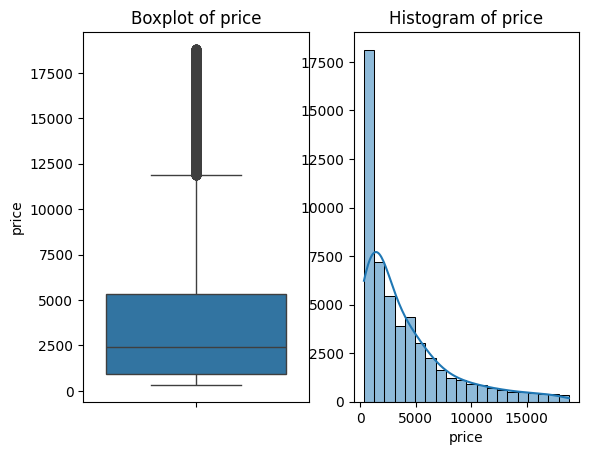

In [14]:
# create the chart with seaborn
seaborn_univariate_numerical(diamonds['price'])

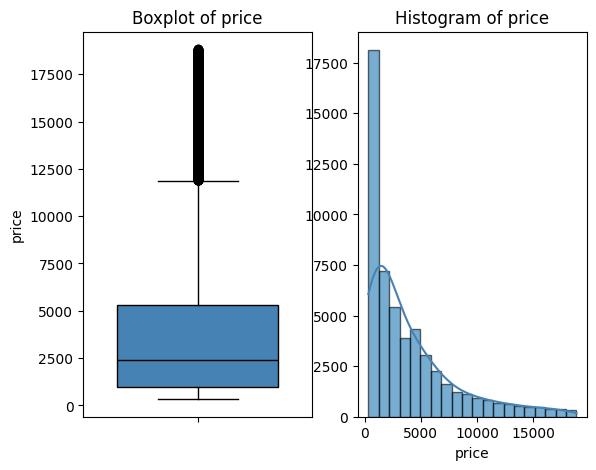

In [15]:
# create the chart with matplotlib
matplotlib_univariate_numerical(diamonds['price'])

The boxplot indicates that there's a significant range in prices, with a large number of outliers on the higher end. The price starts at a minimum of $326 and goes up to a maximum of $18823, with a mean of $3932.80.

The histogram shows that most of the data points are concentrated towards the lower end of the price scale, with the frequency decreasing as the price increases. The high standard deviation of $3989.44 indicates a wide spread of prices. The kernel density estimate overlaid on the histogram suggests that the prices are not normally distributed and are skewed to the right.

<b>Numerical Attribute: `carat`</b>

In [16]:
diamonds['carat'].describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

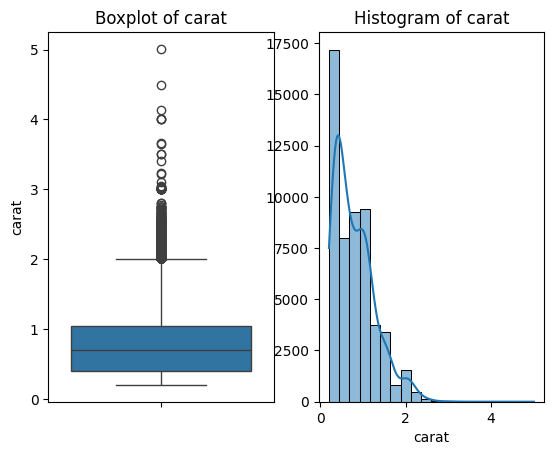

In [17]:
# create the chart with seaborn
seaborn_univariate_numerical(diamonds['carat'])

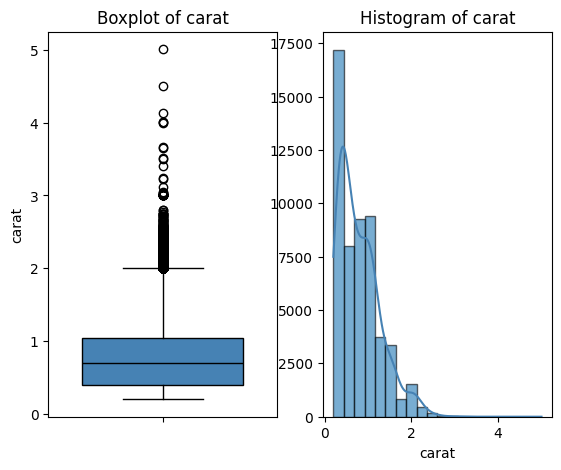

In [18]:
# create the chart with matplotlib
matplotlib_univariate_numerical(diamonds['carat'])

The typical diamond in this dataset is less than 1 carat, with half of the diamonds being 0.70 carats or smaller. While there are diamonds that are much larger, they are relatively rare. There are quite a few outliers, which are represented by dots above the upper whisker, indicating there are some diamonds significantly larger than the rest. These outliers extend up to the maximum reported carat size of 5.01.

The histogram confirms the right-skewed distribution with most diamonds having a lower carat size. The highest frequency of diamonds falls between the smallest carat size (0.20 carats) and somewhere just above the median (0.70 carats). There is a long tail extending towards the right, confirming the presence of diamonds with a larger carat size, though they are less frequent.

The standard deviation of 0.474011 carats indicates there is a moderate spread around the mean, which is further evidenced by the long tail in the histogram.

<b>Categorical Attribute: `cut`</b>

In [19]:
data = diamonds['cut'].value_counts().reindex(['Fair','Good','Very Good','Premium','Ideal'])
data

cut
Fair          1610
Good          4906
Very Good    12082
Premium      13791
Ideal        21551
Name: count, dtype: int64

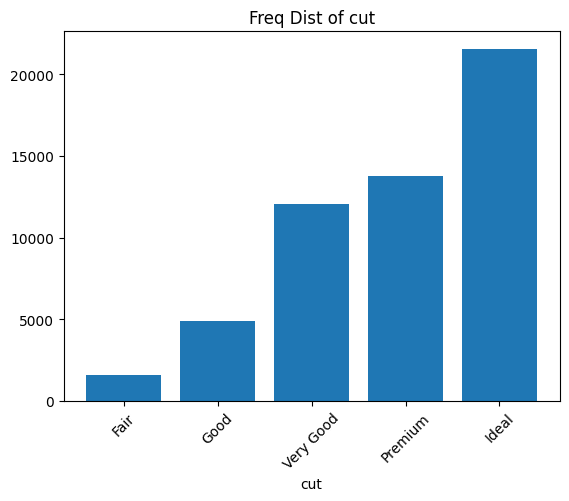

In [20]:
# create the chart with matplotlib
matplotlib_univariate_categorical(data)

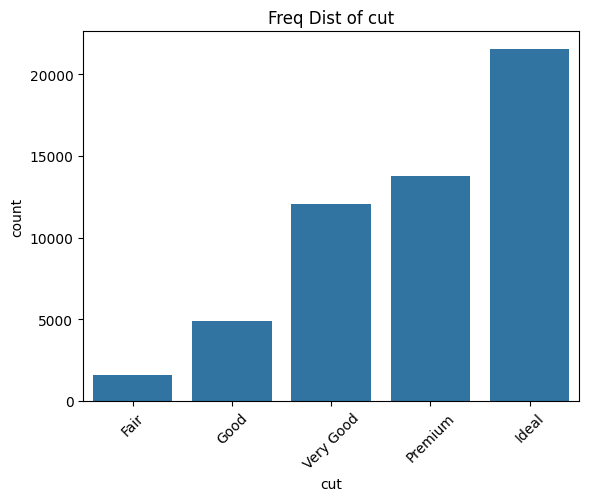

In [21]:
# create the chart with seaborn
seaborn_univariate_categorical(data)

'Ideal' is the most common cut quality among the diamonds, with a frequency of 21,551. This is followed by the 'Premium' cut diamonds, which have a frequency of 13,791. 'Very Good' cut diamonds come next with 12,082 instances. 'Good' cut diamonds are less common, with a count of 4,906, and 'Fair' cut diamonds are the least common, with only 1,610 occurrences in the dataset.

The distribution suggests that the majority of diamonds in the dataset are of high cut quality. This could be indicative of the dataset’s focus on higher-quality diamonds.

<b>Categorical Attribute: `clarity`</b>

In [22]:
data = diamonds['clarity'].value_counts().reindex(['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'])
data

clarity
I1        741
SI2      9194
SI1     13065
VS2     12258
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
Name: count, dtype: int64

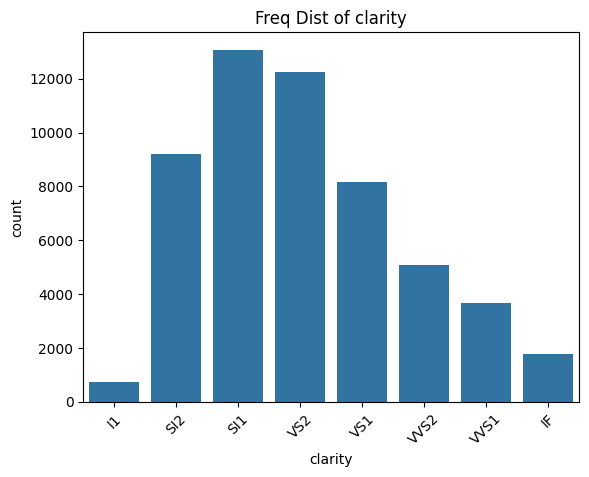

In [23]:
# create the chart with seaborn
seaborn_univariate_categorical(data)

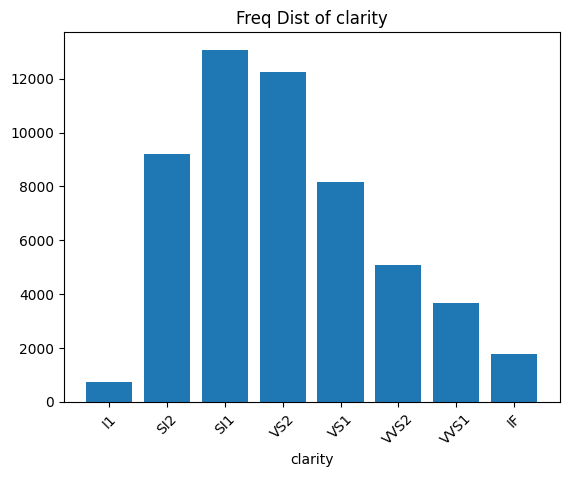

In [24]:
# create the chart with matplotlib
matplotlib_univariate_categorical(data)

The general trend indicated by this chart is that as clarity improves (moving towards the right from I1 to IF), the frequency of diamonds within each clarity category decreases. This suggests that higher clarity diamonds are less common in the dataset. The dataset appears to have a good range of diamonds across the clarity spectrum, but with a clear preference towards the mid-range clarities (SI1, VS2, SI2, VS1).

<b>Categorical Attribute: `color`</b>

In [25]:
data = diamonds['color'].value_counts().reindex(['J','I','H','G','F','E','D'])
data

color
J     2808
I     5422
H     8304
G    11292
F     9542
E     9797
D     6775
Name: count, dtype: int64

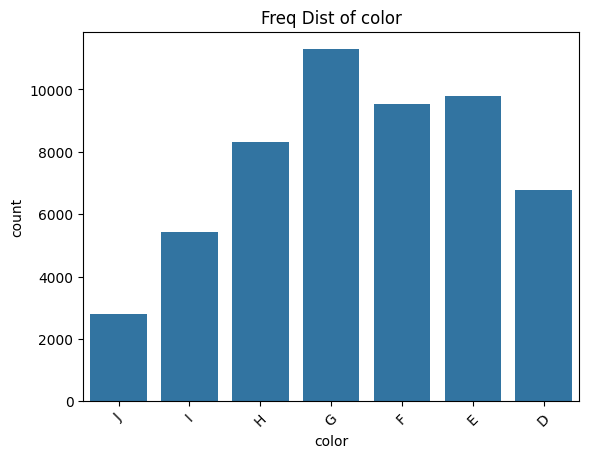

In [26]:
# create the chart with seaborn
seaborn_univariate_categorical(data)

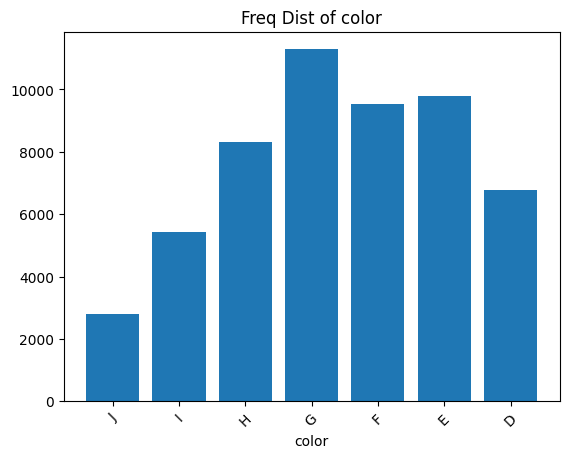

In [27]:
# create the chart with matplotlib
matplotlib_univariate_categorical(data)

The trend shows that diamonds within the colorless (D, E, F) and near-colorless (G, H) range are more commonly available or preferred in this dataset. It indicates that the dataset likely focuses on higher-quality diamonds.

<b>Numerical Attribute: `x`</b>

In [28]:
diamonds['x'].describe()

count    53940.000000
mean         5.731157
std          1.121761
min          0.000000
25%          4.710000
50%          5.700000
75%          6.540000
max         10.740000
Name: x, dtype: float64

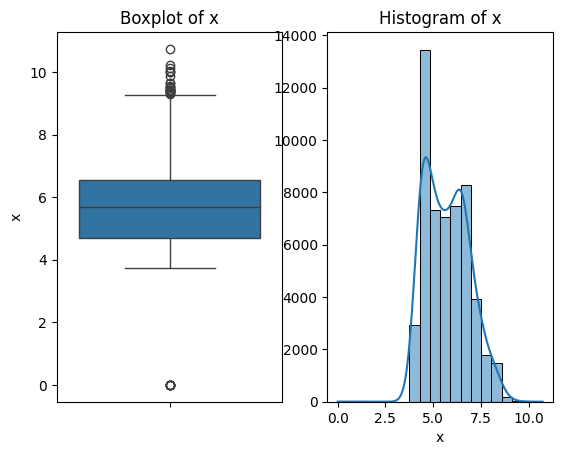

In [29]:
# create the chart with seaborn
seaborn_univariate_numerical(diamonds['x'])

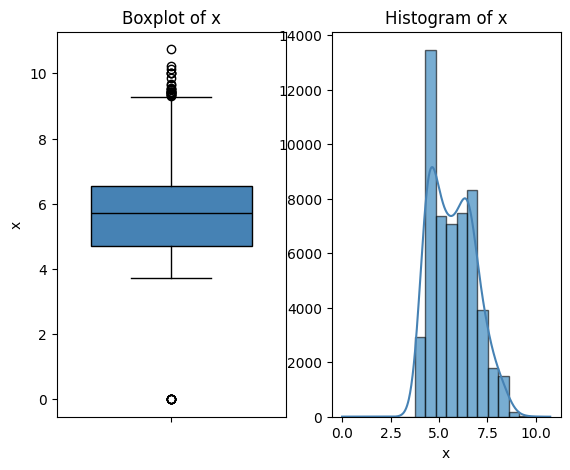

In [30]:
# create the chart with matplotlib
matplotlib_univariate_numerical(diamonds['x'])

Looking at the boxplot, we see that the interquartile range (the box) spans from approximately 4.71 to 6.54, containing the middle 50% of the data. The median is indicated by the line inside the box, which is quite close to the center of the box, suggesting a roughly symmetric distribution around the median.

The "whiskers" of the boxplot, which extend from the box to the smallest and largest values within 1.5 times the interquartile range, reach down to just above 0 and up to around 8.5. Data points outside this range are considered outliers and are plotted as individual points; there are several outliers on both the lower and upper ends.

The histogram reveals the frequency of x values in intervals. It has a strong peak around 5 to 6, which corresponds to the median of the data. The shape of the histogram, with the tail extending to the right, suggests a right-skewed distribution, albeit not heavily so, since the peak is near the center of the data range. The skew is also confirmed by the mean (5.73) being slightly higher than the median (5.7).

<b>Numerical Attribute: `y`</b>

In [31]:
diamonds['y'].describe()

count    53940.000000
mean         5.734526
std          1.142135
min          0.000000
25%          4.720000
50%          5.710000
75%          6.540000
max         58.900000
Name: y, dtype: float64

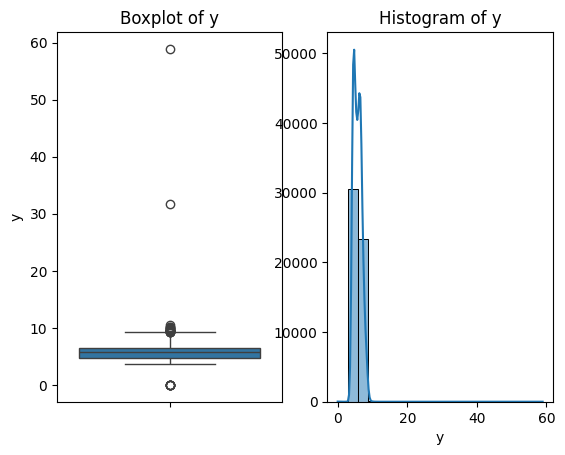

In [32]:
# create the chart with seaborn
seaborn_univariate_numerical(diamonds['y'])

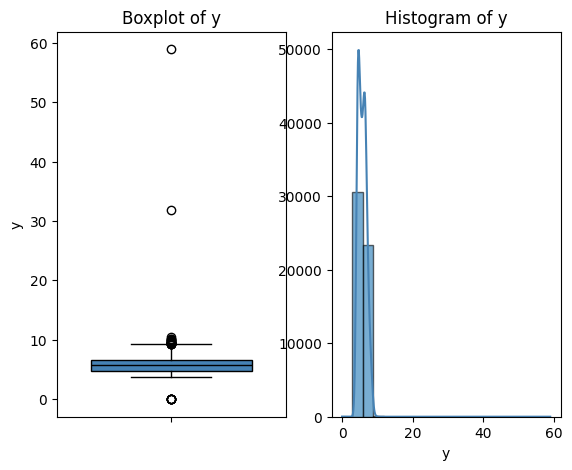

In [33]:
# create the chart with matplotlib
matplotlib_univariate_numerical(diamonds['y'])

In the boxplot of y, the box appears to be very small, indicating that the interquartile range is narrow and that 50% of the data is clustered in a very tight range. The median, denoted by the line inside the box, is again near the center of the box, which might suggest symmetry.

There are several outliers, as indicated by the points beyond the whiskers of the boxplot. The outliers on the upper side are quite extreme, especially the one near 60, which significantly exceeds the rest of the data.

The histogram shows a tall, narrow peak, much like the one seen in the histogram of x, suggesting a strong central tendency around 5 to 6.

<b>Numerical Attribute: `z`</b>

In [34]:
diamonds['z'].describe()

count    53940.000000
mean         3.538734
std          0.705699
min          0.000000
25%          2.910000
50%          3.530000
75%          4.040000
max         31.800000
Name: z, dtype: float64

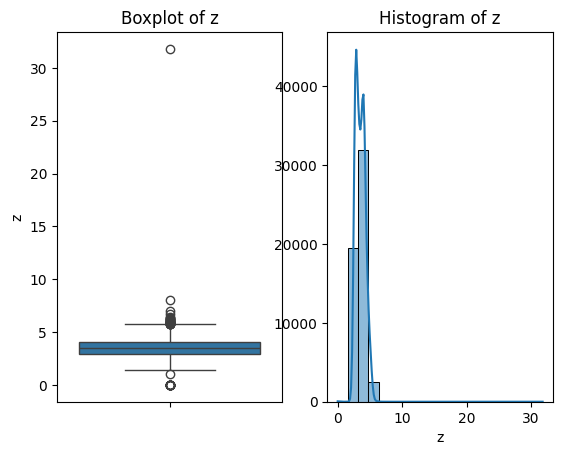

In [35]:
# create the chart with seaborn
seaborn_univariate_numerical(diamonds['z'])

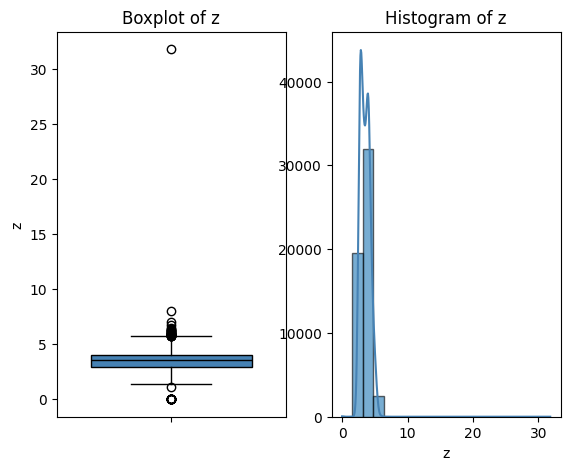

In [36]:
# create the chart with matplotlib
matplotlib_univariate_numerical(diamonds['z'])

The boxplot for z shows a relatively symmetrical distribution around the median. Outliers are present, as indicated by the points beyond the whiskers. 

The histogram for z has a high peak, similar to the distributions of x and y, and it shows the central tendency is strong near the mean value. The peak is narrow, indicating most of the data is tightly grouped around the median. There is a small tail to the right of the histogram, where the outliers reside.

<b>Numerical Attribute: `depth`</b>

In [37]:
diamonds['depth'].describe()

count    53940.000000
mean        61.749405
std          1.432621
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

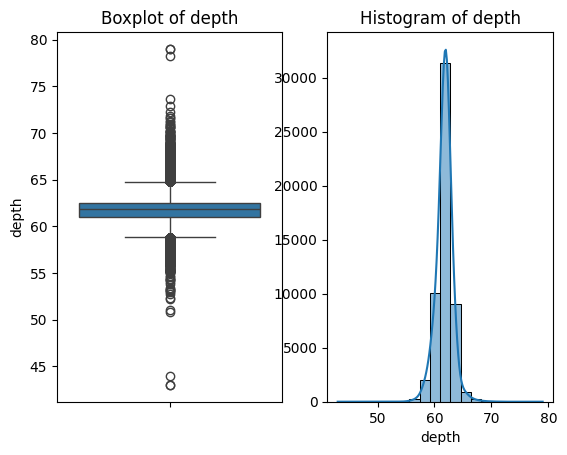

In [38]:
# create the chart with seaborn
seaborn_univariate_numerical(diamonds['depth'])

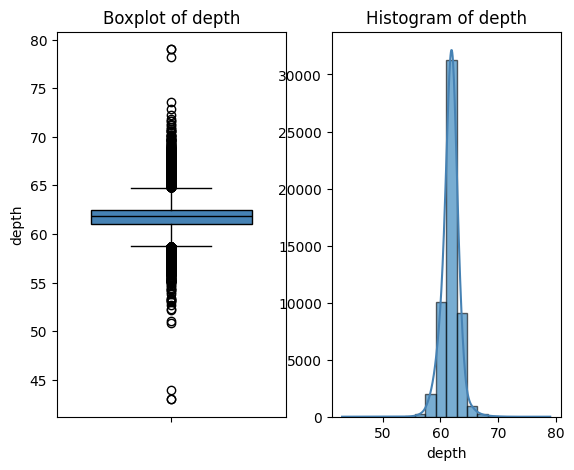

In [39]:
# create the chart with matplotlib
matplotlib_univariate_numerical(diamonds['depth'])

The boxplot shows a concentration of data around the median, with a relatively symmetrical box, implying that the middle 50% of the data is evenly distributed. There are outliers both below and above the main range of the data.

The histogram shows a tall and narrow peak around the mean, suggesting a large concentration of data points near the mean value. The distribution appears roughly symmetrical with a slight skew towards the higher values

<b>Numerical Attribute: `table`</b>

In [40]:
diamonds['table'].describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

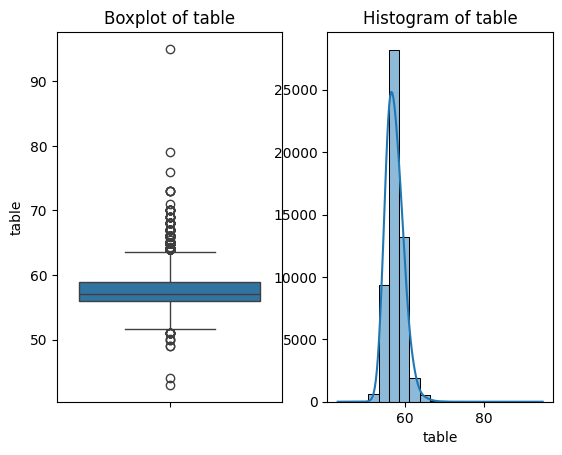

In [41]:
# create the chart with seaborn
seaborn_univariate_numerical(diamonds['table'])

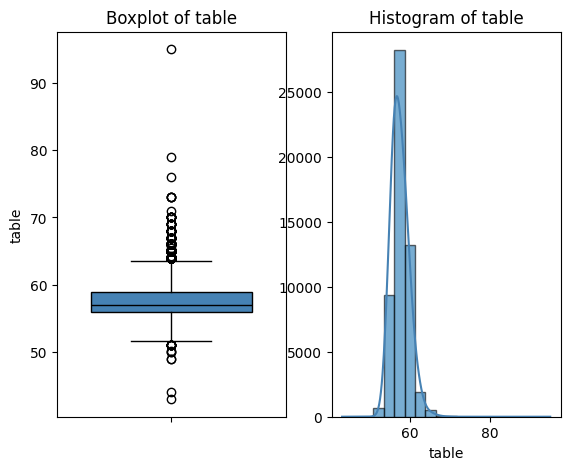

In [42]:
# create the chart with matplotlib
matplotlib_univariate_numerical(diamonds['table'])

Looking at the boxplot, the main box is fairly compact, suggesting that the interquartile range is not very wide. There are several outliers, represented by the individual points that fall below the lower whisker and above the upper whisker. 

The distribution is centered around the 50s to the 60s, with a reasonable amount of variability.

### 2.2. Bivariate Analysis

We need to define some graphical functions for bivariate analysis.

In [43]:
def seaborn_bivariate_numerical_numerical(data: pd.DataFrame, x: str, y: str):
    """
    Create a bivariate scatter plot using Seaborn to visualize the relationship between two numerical variables.
    
    Parameters:
    - data: pd.DataFrame
        The Pandas DataFrame containing the data.
    - x: str
        The name of the column in the DataFrame to be used as the x-axis in the scatter plot.
    - y: str
        The name of the column in the DataFrame to be used as the y-axis in the scatter plot.
    
    The function plots a scatter plot where each point represents an observation with its x and y values.
    """
    # Create a new figure for plotting.
    plt.figure()
    # Plot a scatter plot with the specified columns as the x and y axes.
    # `linewidth=0` removes the outline of the markers.
    sns.scatterplot(x=x, y=y, data=data, linewidth=0)
    # Set the title of the plot. The title indicates the variables being compared.
    plt.title(f'{x} vs. {y}')
    # Display the plot.
    plt.show()

In [44]:
def matplotlib_bivariate_numerical_numerical(data: pd.DataFrame, x: str, y: str):
    """
    Create a bivariate scatter plot using Matplotlib to visualize the relationship between two numerical variables.
    
    Parameters:
    - data: pd.DataFrame
        The Pandas DataFrame containing the data.
    - x: str
        The name of the column in the DataFrame to be used as the x-axis in the scatter plot.
    - y: str
        The name of the column in the DataFrame to be used as the y-axis in the scatter plot.
    
    This function plots a scatter plot where each point represents an observation in the dataset
    with coordinates (x, y) corresponding to the values of the specified columns.
    """
    # Create a new figure for plotting.
    plt.figure()
    # Create a scatter plot. 'x=data[x]' selects the data for the x-axis using the column name 'x',
    # 'y=data[y]' selects the data for the y-axis using the column name 'y',
    # 'linewidths=0' makes the edge lines of the markers have a width of 0 (no edge lines).
    plt.scatter(x=data[x], y=data[y], linewidths=0)
    # Set the title of the plot with the names of the variables used for x and y axes.
    plt.title(f'{x} vs. {y}')
    # Label the x-axis with the name of the x variable.
    plt.xlabel(x)
    # Label the y-axis with the name of the y variable.
    plt.ylabel(y)
    # Display the plot.
    plt.show()

In [45]:
def seaborn_bivariate_categorical_numerical(
    data: pd.DataFrame, 
    x: str, 
    y: str,
    x_order: list,
):
    """
    Create a bivariate boxplot using Seaborn to visualize the distribution of a numerical variable
    across different categories of a categorical variable.
    
    Parameters:
    - data: pd.DataFrame
        The Pandas DataFrame containing the data.
    - x: str
        The name of the categorical column to be used as the x-axis in the boxplot.
    - y: str
        The name of the numerical column to be used as the y-axis in the boxplot.
    - x_order: list
        The specific order in which to display the categories along the x-axis.
    
    The function plots a boxplot where each box represents the distribution of the numerical
    variable within a category, showing the median, quartiles, and potential outliers.
    """
    
    # Create a boxplot with Seaborn. 'data=data' specifies the source DataFrame,
    # 'x=x' sets the categorical variable for the x-axis,
    # 'y=y' sets the numerical variable for the y-axis,
    # 'order=x_order' ensures the categories on the x-axis are displayed according to the given order.
    sns.boxplot(data=data, x=x, y=y, order=x_order)
    # Set the title of the boxplot with the names of the categorical and numerical variables.
    plt.title(f'{x} vs. {y}')
    # Display the plot.
    plt.show()

In [46]:
def matplotlib_bivariate_categorical_numerical(
    data: pd.DataFrame, 
    x: str, 
    y: str,
    x_order: list,
):
    """
    Create a bivariate boxplot using Matplotlib to visualize the distribution of a numerical variable
    across different categories of a categorical variable.
    
    Parameters:
    - data: pd.DataFrame
        The Pandas DataFrame containing the data.
    - x: str
        The name of the categorical column to be plotted on the x-axis.
    - y: str
        The name of the numerical column to be plotted on the y-axis.
    - x_order: list
        The order in which the categorical data should be displayed on the x-axis.
    
    The function generates a boxplot where each box corresponds to the distribution of the numerical
    variable for a particular category, displaying the median, quartiles, and potential outliers.
    """

    # Prepare the data for plotting by creating a list of series.
    # Each series in the list corresponds to the numerical data for a specific category.
    data_to_plot = [data.loc[data[x]==category, y] for category in x_order]
    # Generate a boxplot using Matplotlib.
    # 'x=data_to_plot' specifies the data to be plotted,
    # 'labels=x_order' sets the labels for the x-axis using the category order provided,
    # 'vert=True' makes the boxplots vertical,
    # 'widths=0.8' sets the width of the boxplots,
    # 'patch_artist=True' fills the boxplot with color,
    # 'boxprops' and 'medianprops' customize the appearance of the boxplots.
    plt.boxplot(
        x=data_to_plot, 
        labels=x_order, 
        vert=True, 
        widths=0.8,
        patch_artist=True, 
        boxprops={'facecolor': 'steelblue'}, 
        medianprops={'color': 'black'}
    )
    # Set the title of the plot to indicate the variables being compared.
    plt.title(f'{x} vs. {y}')
    # Set the x-axis label to the name of the categorical variable.
    plt.xlabel(x)
    # Set the y-axis label to the name of the numerical variable.
    plt.ylabel(y)
    # Display the plot.
    plt.show()

In [47]:
def seaborn_bivariate_categorical_categorical(
    data: pd.DataFrame, 
    x: str, 
    hue: str, 
    x_order: list,
    hue_order: list
):
    """
    Create a Seaborn categorical plot to visualize the frequency of categories in a bivariate manner,
    with one categorical variable broken down by another categorical variable.
    
    Parameters:
    - data: pd.DataFrame
        The Pandas DataFrame containing the data.
    - x: str
        The name of the main categorical column for the x-axis.
    - hue: str
        The name of the secondary categorical column used to group the bars and add another dimension to the plot.
    - x_order: list
        The order in which the categories of the main categorical variable should be displayed on the x-axis.
    - hue_order: list
        The order in which the categories of the secondary categorical variable should be displayed within each main category.
    
    This function will produce a count plot with bars representing the counts of the 'x' categories,
    and each bar will be colored in segments to represent the distribution of the 'hue' categories within each 'x' category.
    """
    
    # Create a count plot using Seaborn's catplot function.
    # 'kind="count"' specifies a count plot,
    # 'x=x' sets the main categorical variable for the x-axis,
    # 'hue=hue' sets the secondary categorical variable for coloring the bars,
    # 'order=x_order' arranges the bars according to the specified order for 'x',
    # 'hue_order=hue_order' arranges the color segments according to the specified order for 'hue',
    # 'height' and 'aspect' control the size and shape of the plot.
    ax = sns.catplot(
        data=data, 
        kind="count", 
        x=x, 
        hue=hue,
        order=x_order,
        hue_order=hue_order,
        height=4, 
        aspect=7/4  # Aspect ratio of 7:4, can be adjusted for different size ratios
    )
    # Set the title of the plot using the 'x' and 'hue' variables.
    plt.title(f'Count of {x} by {hue}')
    # Display the plot.
    plt.show()

In [48]:
def matplotlib_bivariate_categorical_categorical(
    data: pd.DataFrame, 
    x: str, 
    hue: str,
    x_order: list,
    hue_order: list,
):
    """
    Generate a Matplotlib bar chart to visualize the frequency of categories in a bivariate manner,
    with one categorical variable broken down by another categorical variable.
    
    Parameters:
    - data: pd.DataFrame
        The DataFrame containing the data.
    - x: str
        The column name of the primary categorical variable.
    - hue: str
        The column name of the secondary categorical variable.
    - x_order: list
        The desired order of categories of the primary variable on the x-axis.
    - hue_order: list
        The desired order of categories of the secondary variable within each primary category.
    
    The function will produce a bar chart with groups of bars representing the counts of the primary variable's categories,
    with each group's bars color-coded to represent the counts of the secondary variable's categories.
    """

    # Create a cross-tabulation of the two categorical variables.
    crosstab_result = pd.crosstab(index=data[x], columns=data[hue])
    # Reorder the crosstab_result according to the specified order for x and hue.
    crosstab_result = crosstab_result.reindex(columns=hue_order, index=x_order)
    # Initialize the plot with the specified figure size.
    fig, ax = plt.subplots(figsize=(8, 4.5))
    # Calculate the number of categories and the width of each bar.
    n_categories = len(crosstab_result.columns)
    width = 0.8 / n_categories
    # Create an array with the positions of each group of bars on the x-axis.
    indices = np.arange(len(x_order))
    # Define a color palette for the bars.
    palette = [
        '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
        '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    ]
    # Plot bars for each category in the hue variable.
    for i, (column, color) in enumerate(zip(crosstab_result.columns, palette)):
        ax.bar(
            indices + i * width,  # Position each bar within its group
            crosstab_result[column], 
            width=width, 
            label=column,
            color=color
        )
    # Customize the appearance of the plot.
    ax.spines['top'].set_visible(False)  # Hide the top spine.
    ax.spines['right'].set_visible(False)  # Hide the right spine.
    # Labeling and titling the axes and the plot.
    ax.set_xlabel(x)
    ax.set_ylabel('Count')
    ax.set_title(f'Count of {x} by {hue}')
    # Set the position and labels of the x-ticks.
    ax.set_xticks(indices + width * (n_categories - 1) / 2)
    ax.set_xticklabels(x_order)
    # Add a legend outside of the main plot area.
    ax.legend(title=hue, bbox_to_anchor=(1.05, 1), loc='upper left')
    # Display the plot.
    plt.show()

`carat` (numerical) vs. `price` (numerical):

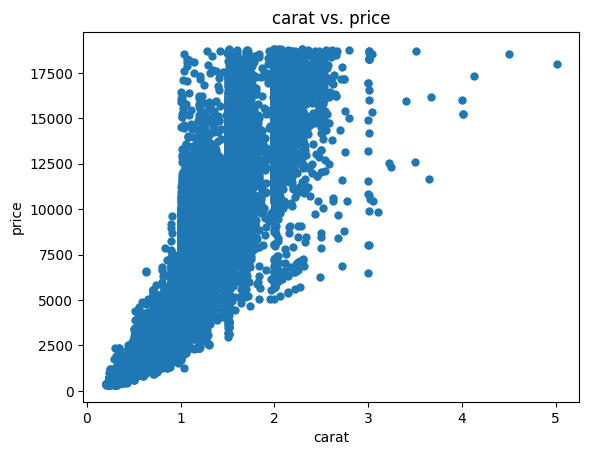

In [49]:
# create the chart with seaborn
seaborn_bivariate_numerical_numerical(data=diamonds, x='carat', y='price')

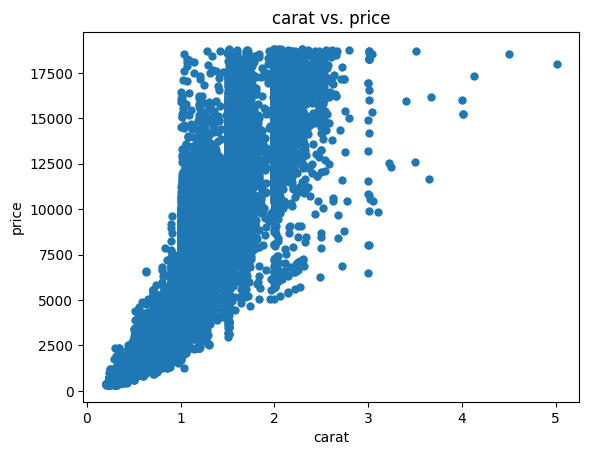

In [50]:
# create the chart with matplotlib
matplotlib_bivariate_numerical_numerical(data=diamonds, x='carat', y='price')

There is a clear positive correlation between carat size and price, as the price tends to increase with larger carat weights. However, there are notable vertical bands (especially around the 1 and 2-carat marks), which suggest that there are price ranges within which diamonds of similar carat weights can significantly vary in price, possibly due to differences in other quality metrics like cut, color, and clarity.

`cut` (categorical) vs. `price` (numerical):

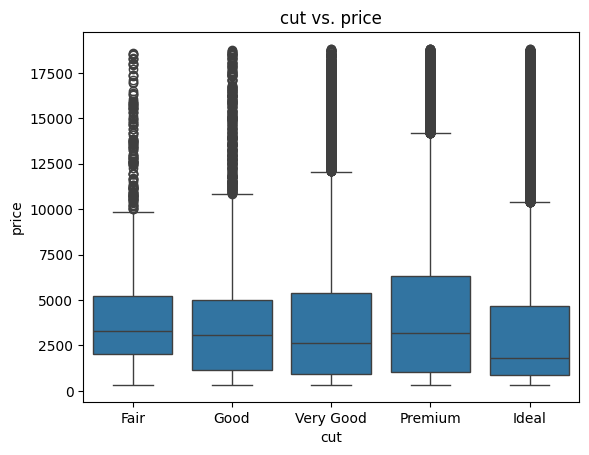

In [51]:
# create the chart with seaborn
seaborn_bivariate_categorical_numerical(
    data=diamonds, 
    x='cut', 
    y='price', 
    x_order=['Fair','Good','Very Good','Premium','Ideal']
)

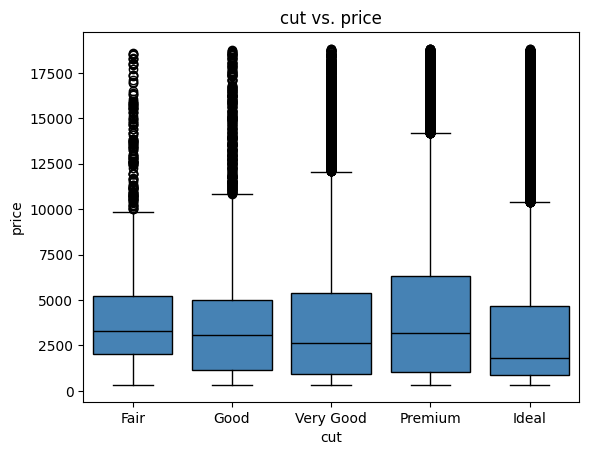

In [52]:
# create the chart with matplotlib
matplotlib_bivariate_categorical_numerical(
    data=diamonds, 
    x='cut', 
    y='price', 
    x_order=['Fair','Good','Very Good','Premium','Ideal']
)

This boxplot represents the distribution of diamond prices across different cut grades. It appears that the median price does not consistently increase from 'Fair' to 'Ideal' cut diamonds. Despite 'Ideal' representing the highest quality of cut, the boxplot shows that the 'Ideal' cut diamonds have the lowest median price compared to the other categories.

This counterintuitive result suggests that factors other than cut quality, such as carat weight, color, and clarity, may have a more significant impact on price.

`color` (categorical) vs. `price` (numerical):

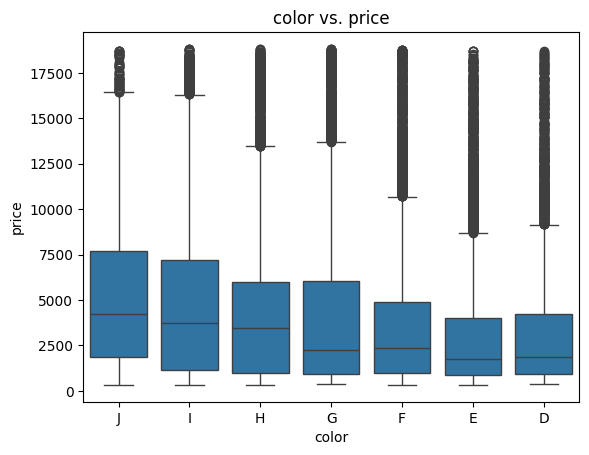

In [53]:
# create the chart with seaborn
seaborn_bivariate_categorical_numerical(
    data=diamonds, 
    x='color', 
    y='price',
    x_order=['J','I','H','G','F','E','D'],
)

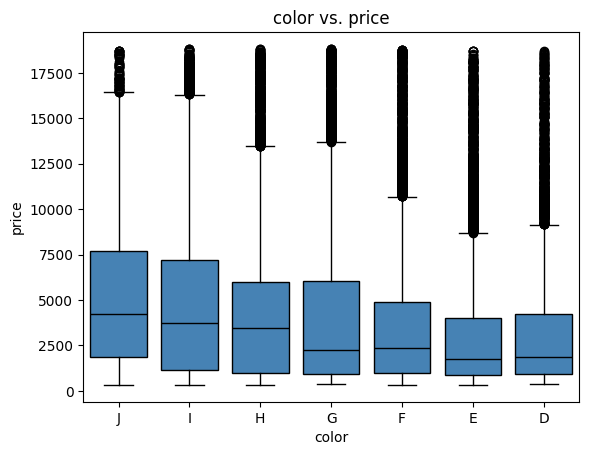

In [54]:
# create the chart with matplotlib
matplotlib_bivariate_categorical_numerical(
    data=diamonds, 
    x='color', 
    y='price',
    x_order=['J','I','H','G','F','E','D'],
)

This boxplot compares the distribution of prices for diamonds across different color grades, from 'D' (colorless) to 'J' (slightly tinted). It shows that the median price generally decreases from 'J' (which has the highest median price among the color grades shown) to 'D' (which has one of the lower median prices).

This trend might seem counterintuitive, as 'D' grade diamonds are considered the highest quality in terms of color and one might expect them to be the most expensive. However, the prices could be influenced by other characteristics of the diamonds, such as their cut, clarity, and especially carat weight. The data suggests that within this dataset, higher color grades (closer to 'D') are not necessarily the most expensive, and factors contributing to the price are more complex.

`clarity` (categorical) vs. `price` (numerical):

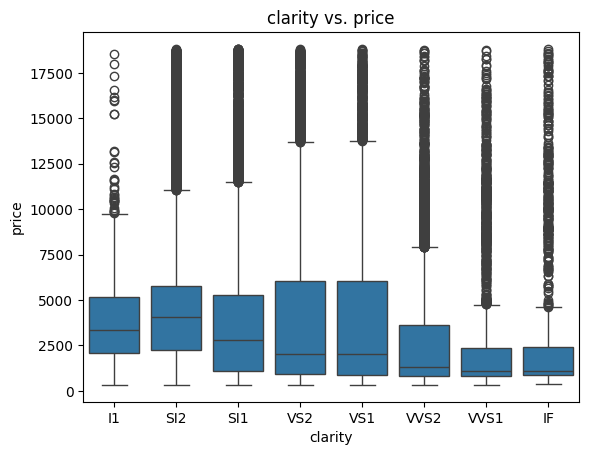

In [55]:
# create the chart with seaborn
seaborn_bivariate_categorical_numerical(
    data=diamonds, 
    x='clarity', 
    y='price',
    x_order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']
)

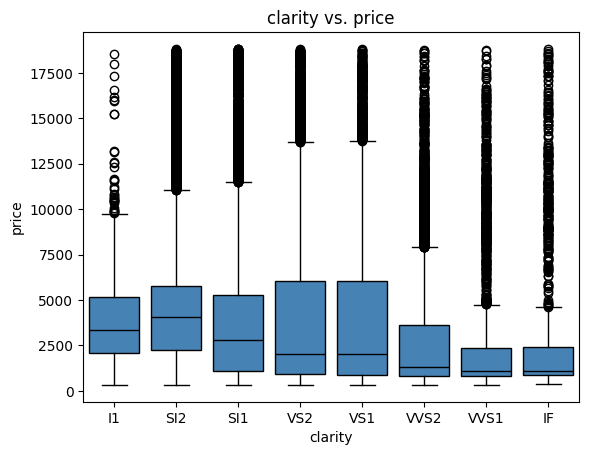

In [56]:
# create the chart with matplotlib
matplotlib_bivariate_categorical_numerical(
    data=diamonds, 
    x='clarity', 
    y='price',
    x_order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']
)

The boxplot depicts the price distribution of diamonds across various clarity grades, from 'I1' (included) to 'IF' (internally flawless). The boxplot suggests that the median price decreases as the clarity grade improves from 'I1' to 'IF'. This is an unexpected trend since 'IF' diamonds, being the highest clarity, would typically be thought to have the highest prices. 

This observation suggests that within this particular dataset, higher clarity may not be the dominating factor in diamond pricing, or that the sample of higher clarity diamonds may include other characteristics that lower their price, such as smaller carat weight or less desirable color grades

`x` (numerical) vs. `price` (numerical):

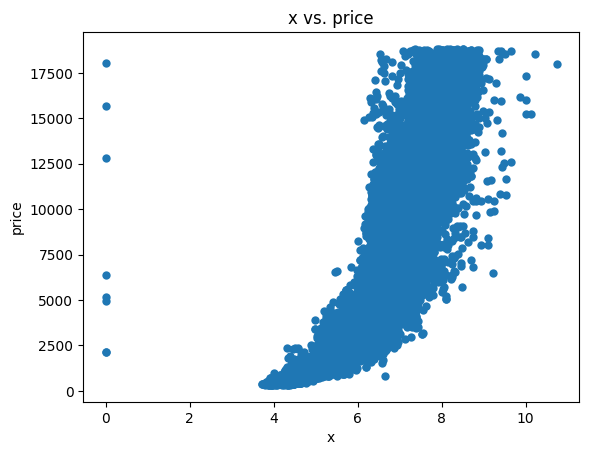

In [57]:
# create the chart with seaborn
seaborn_bivariate_numerical_numerical(data=diamonds, x='x', y='price')

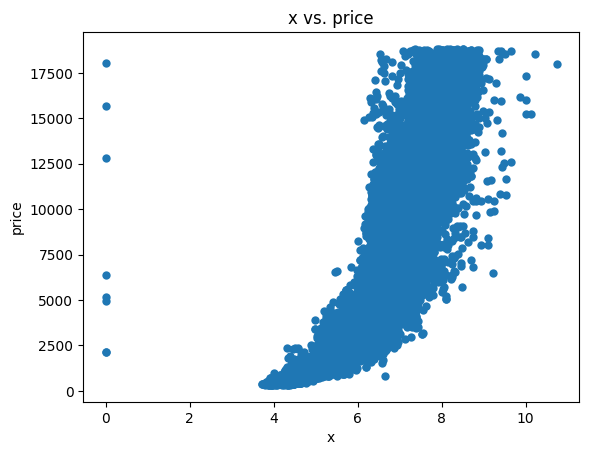

In [58]:
# create the chart with matplotlib
matplotlib_bivariate_numerical_numerical(data=diamonds, x='x', y='price')

There is a visible trend indicating that as the 'x' dimension (length of the diamond) increases, the price generally tends to increase as well. This correlation suggests that larger diamonds tend to be more expensive, which aligns with expectations since larger diamonds are rarer and often considered more desirable.

`y` (numerical) vs. `price` (numerical):

In [59]:
# ignore extreme values
y_cutoff = diamonds['y'].quantile(0.999)
data = diamonds.loc[diamonds['y']<y_cutoff]

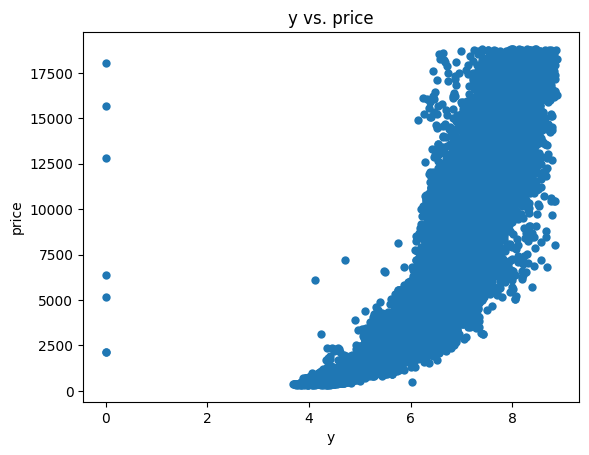

In [60]:
# create the chart with seaborn
seaborn_bivariate_numerical_numerical(data=data, x='y', y='price')

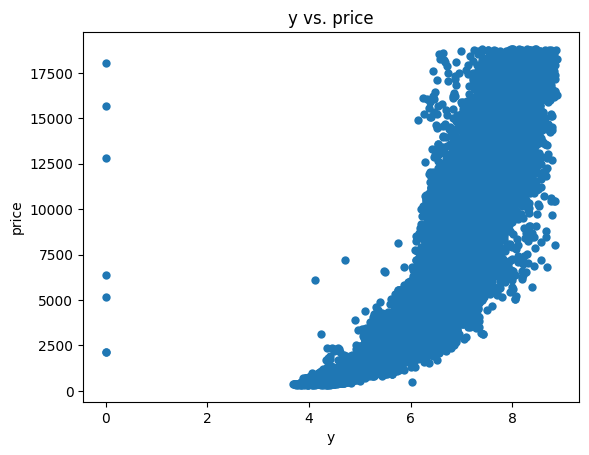

In [61]:
# create the chart with matplotlib
matplotlib_bivariate_numerical_numerical(data=data, x='y', y='price')

Similar to the previous plot concerning the 'x' dimension, there is a positive correlation where the price generally increases with the size of the 'y' dimension (width of the diamond), indicating that wider diamonds are more expensive, which is consistent with the notion that larger diamonds are valued higher.

`z` (numerical) vs. `price` (numerical)

In [62]:
# ignore extreme values
z_cutoff = diamonds['z'].quantile(0.999)
data = diamonds.loc[diamonds['z']<z_cutoff]

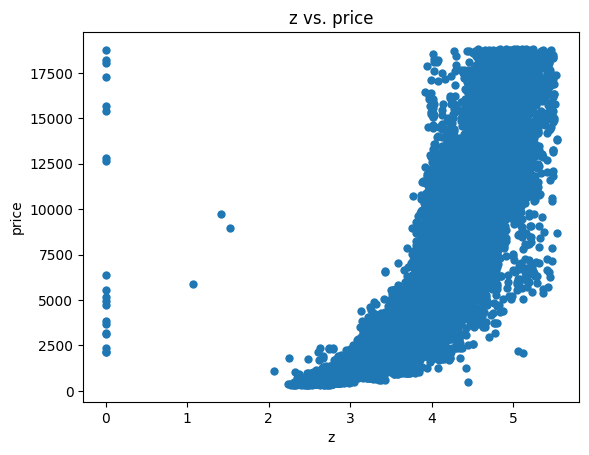

In [63]:
# create the chart with seaborn
seaborn_bivariate_numerical_numerical(data=data, x='z', y='price')

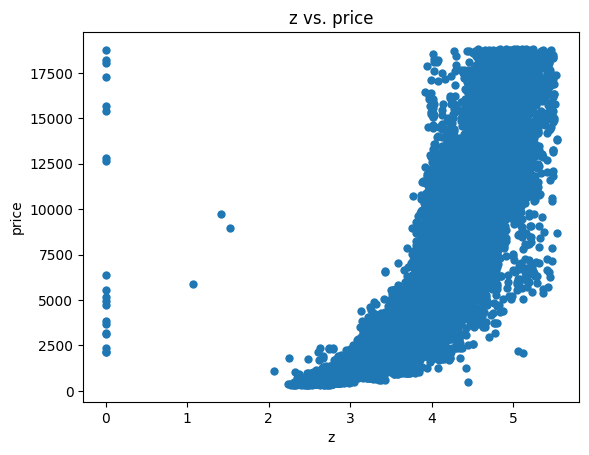

In [64]:
# create the chart with matplotlib
matplotlib_bivariate_numerical_numerical(data=data, x='z', y='price')

The overall trend suggests a positive correlation, meaning that as the depth of a diamond increases, its price tends to increase as well. This pattern is consistent with the general principle that larger diamonds, which typically have greater depth, have higher prices.

`depth` (numerical) vs. `price` (numerical):

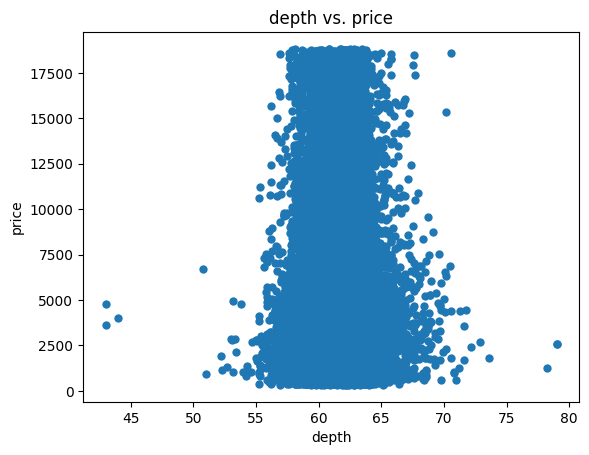

In [65]:
# create the chart with seaborn
seaborn_bivariate_numerical_numerical(data=diamonds, x='depth', y='price')

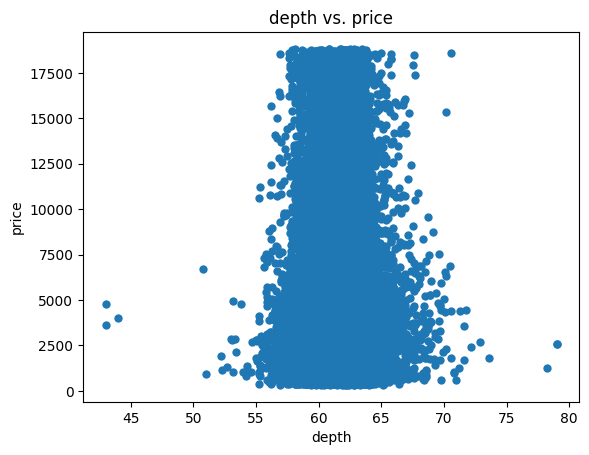

In [66]:
# create the chart with matplotlib
matplotlib_bivariate_numerical_numerical(data=diamonds, x='depth', y='price')

The plot does not show a clear or linear relationship between the depth percentage and the price of the diamonds. Instead, there's a wide dispersion of price points across nearly all values of depth percentage. This suggests that the depth percentage by itself is not a strong predictor of the diamond's price. There are many diamonds with a similar depth percentage that have a wide range of prices.

`table` (numerical) vs. `price` (numerical):

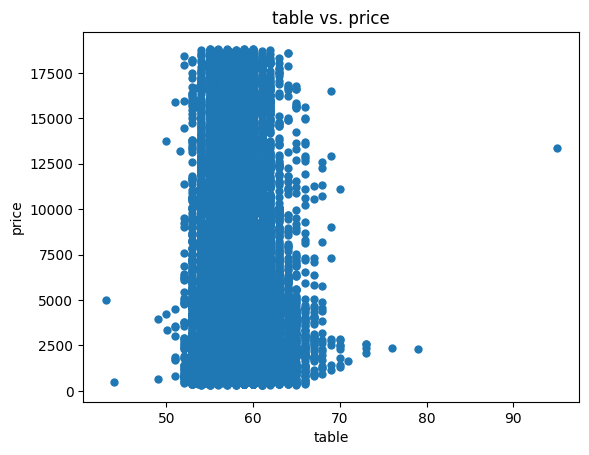

In [67]:
# create the chart with seaborn
seaborn_bivariate_numerical_numerical(data=diamonds, x='table', y='price')

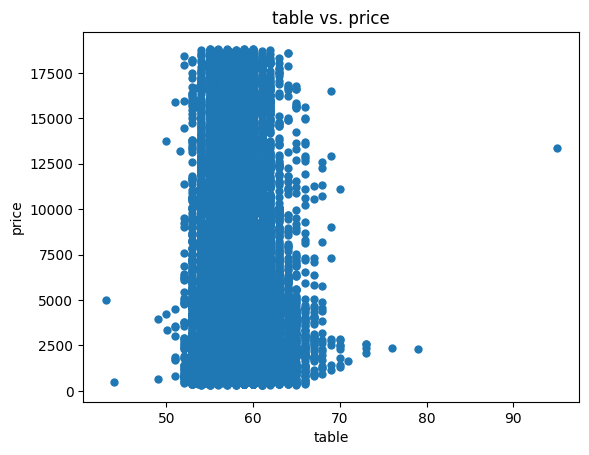

In [68]:
# create the chart with matplotlib
matplotlib_bivariate_numerical_numerical(data=diamonds, x='table', y='price')

This plot shows that there is a considerable variation in price across the range of table percentages, but there is no distinct trend indicating that a larger or smaller table correlates consistently with higher or lower prices. While there are concentrations of data points around certain table percentages, the variation in price at each of these points is substantial.

`color` (categorical) vs. `cut` (categorical):

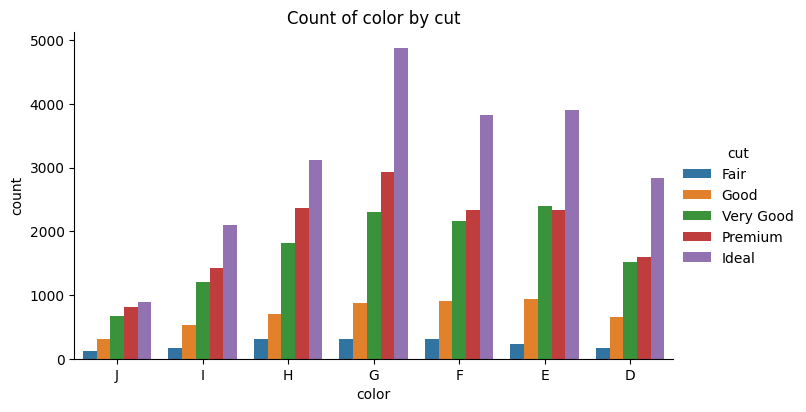

In [69]:
# create the chart with seaborn
seaborn_bivariate_categorical_categorical(
    data=diamonds, 
    x='color', 
    hue='cut',
    x_order=['J','I','H','G','F','E','D'],
    hue_order=['Fair','Good','Very Good','Premium','Ideal'],
)

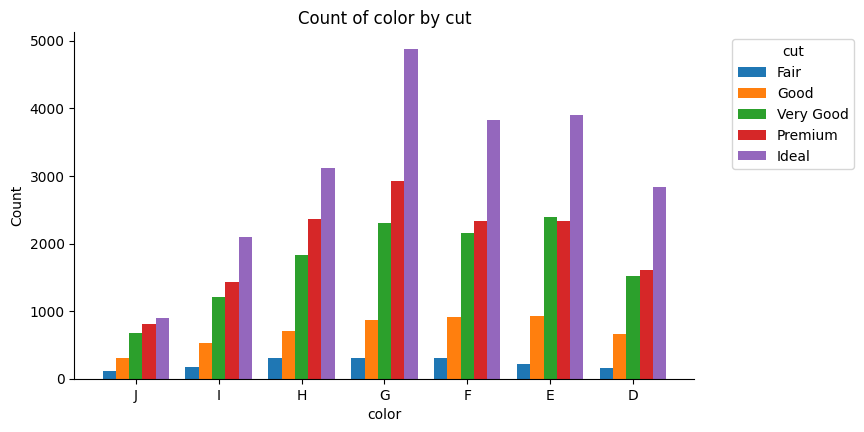

In [70]:
# create the chart with matplotlib
matplotlib_bivariate_categorical_categorical(
    data=diamonds, 
    x='color', 
    hue='cut',
    x_order=['J','I','H','G','F','E','D'],
    hue_order=['Fair','Good','Very Good','Premium','Ideal'],
)

From the chart, we can observe several points:

- The 'Ideal' cut is the most common across all color grades.
- The 'G' color grade has the highest count across all cuts, suggesting it is a very popular choice among buyers.
- The 'D' color grade, while being the best in terms of color, doesn't have the highest count in any cut category, which may suggest that it is less common on the market, leading to fewer sales in that category.
- The 'Fair' cut is the least common among higher color grades (E and D), which might imply that higher color grade diamonds are typically given a better cut to enhance their value.

`clarity` (categorical) vs. `cut` (categorical):

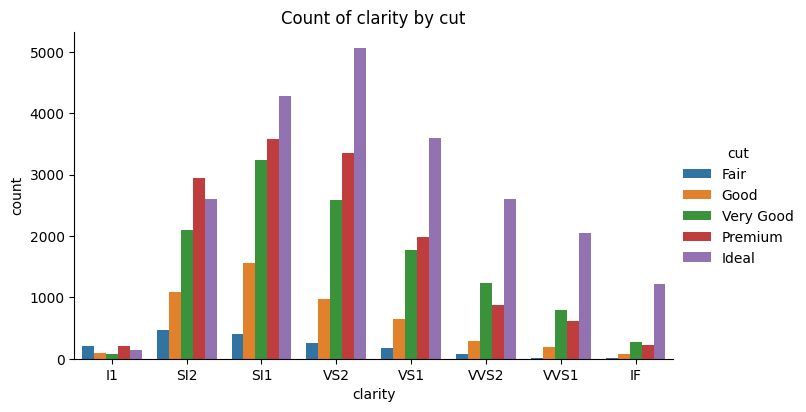

In [71]:
# create the chart with seaborn
seaborn_bivariate_categorical_categorical(
    data=diamonds, 
    x='clarity', 
    hue='cut',
    x_order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'],
    hue_order=['Fair','Good','Very Good','Premium','Ideal'],
)

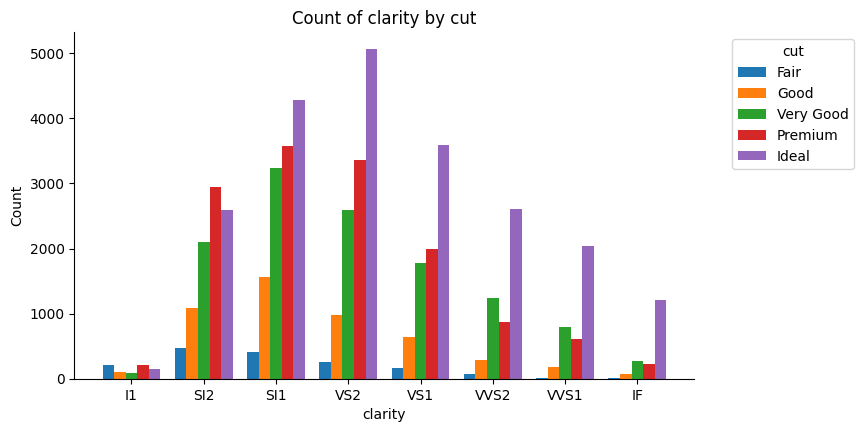

In [72]:
# create the chart with matplotlib
matplotlib_bivariate_categorical_categorical(
    data=diamonds, 
    x='clarity', 
    hue='cut',
    x_order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'],
    hue_order=['Fair','Good','Very Good','Premium','Ideal'],
)

From the chart, several observations can be made:

- The 'SI1' (Slightly Included 1) clarity grade has the highest count for the 'Very Good' and 'Premium' cuts, indicating a preference or greater availability of this clarity grade in higher-quality cuts.
- The 'Ideal' cut has the most substantial distribution across almost all clarity grades, suggesting that diamonds with the 'Ideal' cut are widely available or preferred in the market for various clarity levels.
- 'IF' clarity diamonds, while being the highest quality in terms of clarity, is among the least represented categories in the chart, which is likely due to their rarity and high cost.

### 2.3. Multivariate Analysis

We need to define some graphical functions for multivariate analysis.

In [73]:
def seaborn_multivariate(
    data: pd.DataFrame,
    x: str,
    y: str,
    hue: str,
    x_order: list,
    hue_order: list,
):
    """
    Create a multivariate Seaborn bar chart that shows the relationship between two categorical variables
    and one numerical variable.
    
    Parameters:
    - data: pd.DataFrame
        The DataFrame containing the data.
    - x: str
        The name of the primary categorical variable to be plotted on the x-axis.
    - y: str
        The name of the numerical variable to be plotted on the y-axis.
    - hue: str
        The name of the secondary categorical variable that will be used for color coding the bars.
    - x_order: list
        The order in which the categories of the primary categorical variable should be displayed on the x-axis.
    - hue_order: list
        The order in which the categories of the secondary categorical variable should be displayed within each primary category.
    
    This function will generate a bar chart with each primary category on the x-axis and the mean (or other aggregate) of the numerical
    variable on the y-axis, with the bars grouped by the primary category and color-coded by the secondary category.
    """
    
    # Create the catplot bar chart using Seaborn.
    ax = sns.catplot(
        data=data,  # Pass the DataFrame.
        x=x,  # Set the primary categorical variable for the x-axis.
        y=y,  # Set the numerical variable for the y-axis.
        hue=hue,  # Set the secondary categorical variable for color coding.
        kind='bar',  # Specify the kind of plot as 'bar'.
        order=x_order,  # Set the order of categories for the x-axis.
        hue_order=hue_order,  # Set the order of categories for the color coding.
        height=5,  # Specify the height of the plot.
        aspect=2,  # Specify the aspect ratio of the plot.
    )
    # Set the title of the plot.
    plt.title(f'{x} vs. {hue} vs. {y}')
    # Display the plot.
    plt.show()

In [74]:
def matplotlib_multivariate(
    data: pd.DataFrame,
    x: str,
    y: str,
    hue: str,
    x_order: list,
    hue_order: list
):
    """
    Create a multivariate bar chart using matplotlib that displays the mean of a numerical 
    variable 'y' for each category of 'x', grouped by the 'hue' categorical variable, 
    with error bars representing the 95% confidence intervals.
    
    Parameters:
    - data (pd.DataFrame): The data frame containing the variables.
    - x (str): The name of the categorical variable to be used on the X-axis.
    - y (str): The name of the numerical variable whose mean is calculated for each category of 'x'.
    - hue (str): The name of the categorical variable by which the data is grouped in different colors.
    - x_order (list): The specific order in which 'x' categories should be displayed on the X-axis.
    - hue_order (list): The specific order in which 'hue' categories are to be layered in the plot.
    
    This function will generates a matplotlib figure showing a grouped bar chart with the means of 'y' 
    for each category of 'x', grouped by 'hue' levels with error bars for the 95% confidence intervals.
    """

    # Determine the number of hue levels and create a color map
    n_hue_levels = len(hue_order)
    # Define the color palette to use for the hue levels
    colors = [
        '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
        '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    ]
    # Calculate the width of each bar, based on the number of hue levels
    bar_width = 0.8 / n_hue_levels
    # Initialize the matplotlib figure and axes
    fig, ax = plt.subplots(figsize=(12, 5.5))

    # Loop through each level of the 'hue' categorical variable
    for i, (hue_level, color) in enumerate(zip(hue_order, colors)):
        # Filter the dataframe for the current level of 'hue'
        hue_data = data[data[hue] == hue_level]
        # Compute the mean of 'y' for each category of 'x'
        means = hue_data.groupby(x)[y].mean().reindex(x_order)
        # Calculate the standard error of the mean and the 95% confidence intervals
        stderr = hue_data.groupby(x)[y].sem().reindex(x_order)
        conf_int = stderr * scipy.stats.t.ppf((1 + 0.95) / 2., hue_data.groupby(x)[y].count() - 1)
        # Calculate the x-axis positions for the bars
        bar_positions = np.arange(len(x_order)) + i * bar_width - (bar_width * (n_hue_levels / 2))
        # Plot the bars at the calculated positions
        bars = ax.bar(bar_positions, means, width=bar_width, label=hue_level, color=color)
        # Add error bars to each bar to show the 95% confidence intervals
        ax.errorbar(bar_positions, means, yerr=conf_int, fmt='none', ecolor='black')

    # Remove the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # Set the x-tick labels at the center position of the grouped bars
    ax.set_xticks(np.arange(len(x_order)))
    ax.set_xticklabels(x_order)
    # Add a legend to the plot to identify the 'hue' levels
    ax.legend(title=hue, bbox_to_anchor=(1.1, 0.5), loc='center right', frameon=False)
    # Set the title of the plot and the labels for x and y axes
    ax.set_title(f'{x} vs. {hue} vs. {y}')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    # Display the plot
    plt.show()

`cut` (categorical) vs. `color` (categorical) vs. `price` (numerical):

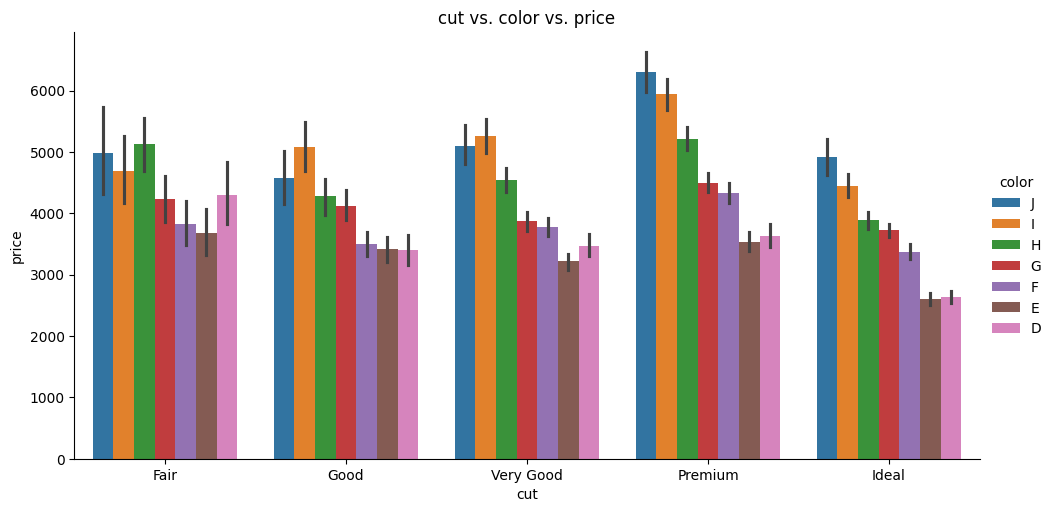

In [75]:
# Create the chart with seaborn
seaborn_multivariate(
    data=diamonds, 
    x='cut', 
    y='price', 
    hue='color', 
    x_order=['Fair','Good','Very Good','Premium','Ideal'], 
    hue_order=['J','I','H','G','F','E','D']
)

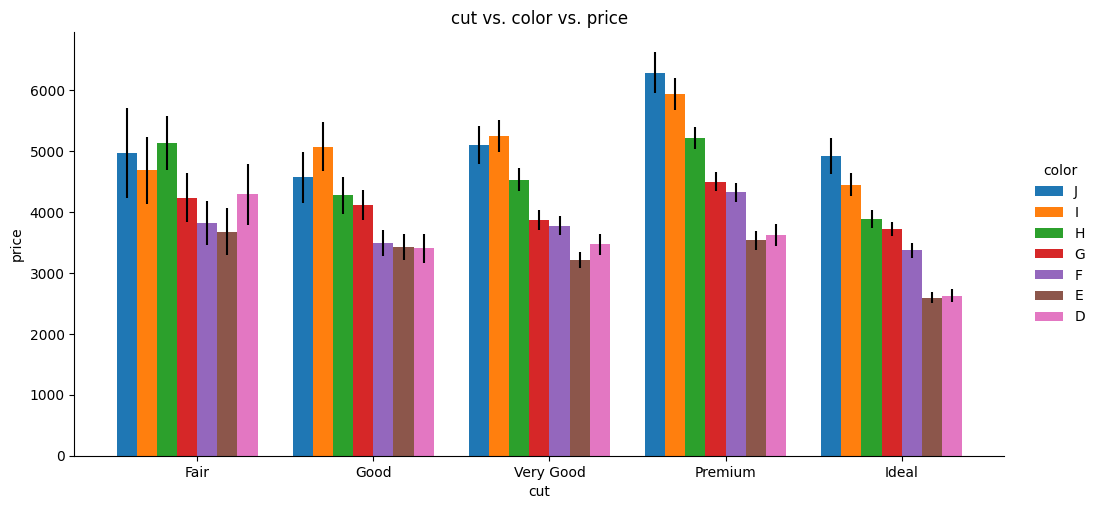

In [76]:
# Create the chart with matplotlib
matplotlib_multivariate(
    data=diamonds, 
    x='cut', 
    y='price', 
    hue='color', 
    x_order=['Fair','Good','Very Good','Premium','Ideal'], 
    hue_order=['J','I','H','G','F','E','D']
)

The multivariate bar chart compares the average price of diamonds across two categorical variables: cut quality (Fair, Good, Very Good, Premium, Ideal) and color grade (J, I, H, G, F, E, D). 

- The "Ideal" cut quality diamonds do not have the highest average price for every color grade.
- There is substantial variability in price within each category, as indicated by the length of the error bars
- The average price does not increase with higher cut quality or better color grade.

## Part 3: Inferences

#### 1. What proportion of diamonds have a clarity of Sl1, Sl2, or VS2? 

In [77]:
diamonds['clarity'].value_counts() / diamonds.shape[0]

clarity
SI1     0.242214
VS2     0.227253
SI2     0.170449
VS1     0.151483
VVS2    0.093919
VVS1    0.067760
IF      0.033185
I1      0.013737
Name: count, dtype: float64

The given code calculates the frequency distribution of different clarity grades in the diamonds DataFrame and then divides these counts by the total number of entries in the DataFrame to find the proportion of each clarity grade. 

From the resulting proportions, it can be seen that the clarity grades of SI1, VS2, and SI2 are the most frequent. The combined proportion of diamonds with a clarity of SI1, SI2, or VS2 is 0.242214 (SI1) + 0.227253 (VS2) + 0.170449 (SI2) = 63.99%. This indicates that nearly 64% of diamonds in the dataset have a clarity grade of SI1, SI2, or VS2.

#### 2. How many of the diamonds have a length that is less than ¾ of the mean diamond length?

In [78]:
mean_length = diamonds['x'].mean()
(diamonds['x'] < 3/4 * mean_length).sum()

2942

In order to determine the number of diamonds with a length less than ¾ of the mean diamond length, the code calculates the mean length of all diamonds in the dataset using `diamonds['x'].mean()`. The expression `diamonds['x'] < 3/4 * mean_length` creates a Boolean Series where each entry is True if the condition is met and False otherwise. The `.sum()` method is then used to count the number of True values, which correspond to diamonds meeting the criterion.

The result of 2942 indicates that there are 2942 diamonds in the dataset with a length less than ¾ of the mean length. Given the total number of diamonds is 53940, there are approximately 5.45% of diamonds with a length less than three-quarters of the mean diamond length in this particular dataset.

#### 3. How many of the diamonds have a carat value that is greater than the median carat value?

In [79]:
median_carat = diamonds['carat'].median()
(diamonds['carat'] > median_carat).sum()


26778

The code calculates the median carat value of the diamond dataset and then counts how many diamonds have a carat value greater than this median. By summing the Boolean Series resulting from the comparison to the median, we find that there are 26,778 diamonds above the median carat value.

#### 4. How many diamonds have either a ‘Fair’ or a ‘Premium’ cut?
Note that the possible values for the quality of a cut are ranked in ascending order as follows:  Fair / Good /  Very Good /  Premium / Ideal

In [80]:
result = diamonds['cut'].value_counts()
result = result.reindex(['Fair','Good','Very Good','Premium','Ideal'])
result

cut
Fair          1610
Good          4906
Very Good    12082
Premium      13791
Ideal        21551
Name: count, dtype: int64

The code sequence first computes the frequency distribution of the 'cut' column in the diamonds dataset, which categorizes diamonds by the quality of their cut. It then reindexes the resulting series to ensure that it is in the order of ascending cut quality, from 'Fair' to 'Ideal'. 

From the frequency distribution, it is observed that 1,610 diamonds are classified with a 'Fair' cut and 13,791 with a 'Premium' cut. Therefore, there are 15,401 of the total number of diamonds are classified as either 'Fair' or 'Ideal' cut.

#### 5. Which diamond has the lowest price per carat? What is its value?

Answer by providing the dataframe row index and the price per carat for that specific diamond.

In [81]:
(diamonds['price'] / diamonds['carat']).sort_values(ascending=True)

31962     1051.162791
15        1078.125000
4         1080.645161
28285     1109.090909
13        1109.677419
             ...     
26998    16764.705882
27457    16928.971963
27226    17077.669903
27530    17083.177570
27635    17828.846154
Length: 53940, dtype: float64

To determine which diamond has the lowest price per carat, the code divides the 'price' column by the 'carat' column for each diamond in the dataset, effectively calculating the price per carat for each diamond. It then sorts these values in ascending order. The diamond with the index 31962 has the lowest price per carat at approximately 1051.16, indicating it offers the least cost per unit of weight among all diamonds listed in the dataset.

#### 6. Using both Matplolib and Seaborn, make and compare boxplots of carat metric for each distinct clarity value and discuss any conclusions you can draw from your comparison of the appearance of the boxplots. 


We can reuse the graphical functions defined in Part 2:

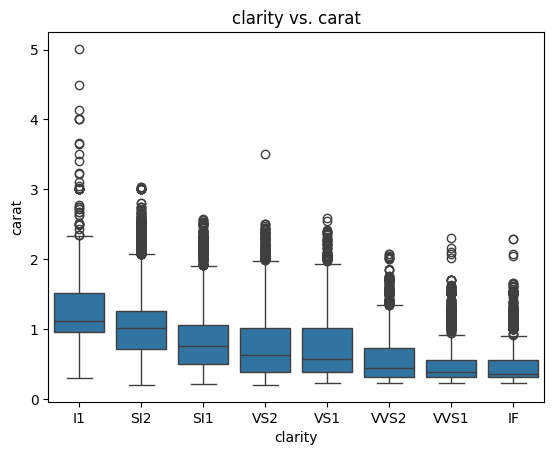

In [82]:
# Create the plot with seaborn
seaborn_bivariate_categorical_numerical(
    data=diamonds, 
    x='clarity', 
    y='carat', 
    x_order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'],
)

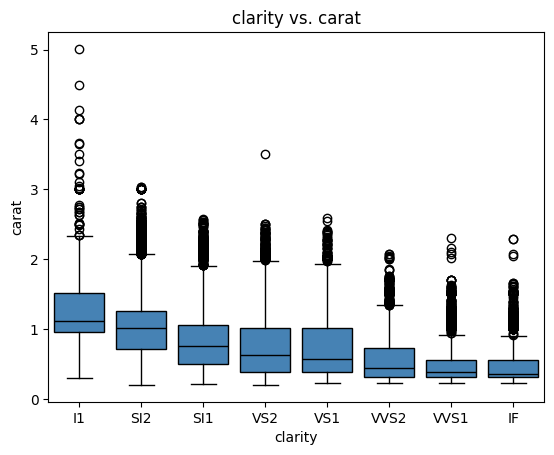

In [83]:
# Create the plot with matplotlib
matplotlib_bivariate_categorical_numerical(
    data=diamonds, 
    x='clarity', 
    y='carat', 
    x_order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'],
)

The median carat size varies across clarity grades. The median appears to be higher in the I1 category and decreases as the clarity improves, with the IF category having the lowest median carat size.

The interquartile range (IQR), which represents the middle 50% of the data, is quite wide for the lower to middle clarity diamonds (I1, SI2, SI1, VS2, VS1), suggesting a greater variability in carat sizes. The IQRs for higher clarity diamonds (VVS2, VVS1, and IF) are narrower, indicating more consistency in carat size within these groups.

There are outliers present in each category, shown as dots outside the "whiskers" of the boxplots. Outliers represent diamonds that are of unusually large for their clarity category.

The lengths of the whiskers vary among the clarity categories, with the I1 category showing particularly long whiskers, suggesting the presence of diamonds with both very high and very low carat sizes relative to the median.

#### 7. Using both Matplolib and Seaborn, make a scatter plot of carat vs. depth. What can we say about the relationship between those two attributes?

We can reuse the graphical functions defined in Part 2:

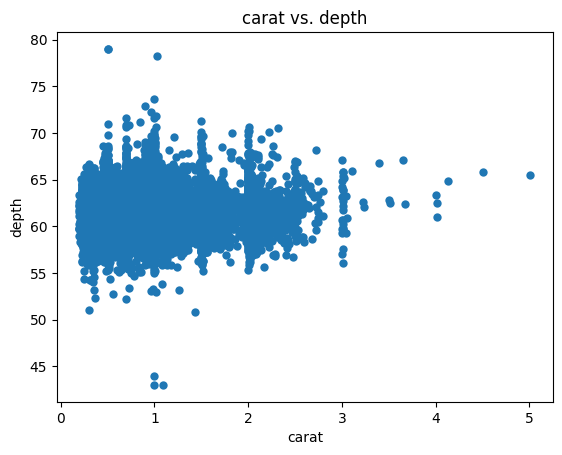

In [84]:
# Create the plot with seaborn
seaborn_bivariate_numerical_numerical(data=diamonds, x='carat', y='depth')

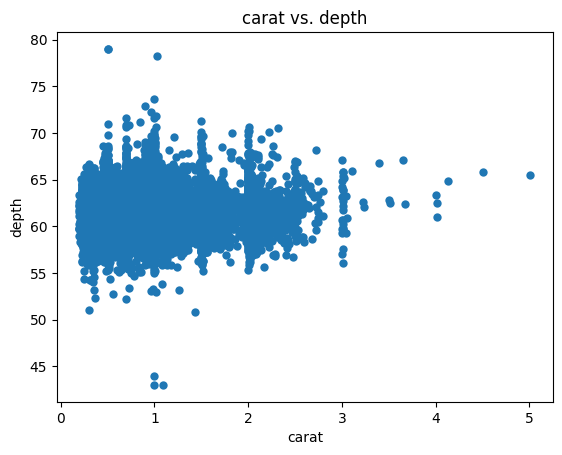

In [85]:
# Create the plot with matplotlib
matplotlib_bivariate_numerical_numerical(data=diamonds, x='carat', y='depth')

The plot does not indicate a strong or obvious correlation between the diamond weight and depth percentage. The depth of diamonds does not seem to increase or decrease consistently with the carat weight. This implies that other factors, perhaps related to the diamond's cut quality or intended shape, might play a more significant role in determining its depth percentage. 

## Part 4: Conclusions

In evaluating the relationship between diamond characteristics and pricing, my findings reveal somewhat unexpected patterns:

1. The connection between a diamond's carat size and its price emerges as a prominent factor, with a discernible positive correlation indicating that larger diamonds generally leads to higher prices (Day's Jewelers, n.d.).

2. The quality of a diamond's cut is traditionally associated with its ability to reflect light, with 'Ideal' cuts often sought after for their superior brilliance. Surprisingly, our analysis of the dataset reveals that diamonds with 'Ideal' cuts do not necessarily hold the highest median price compared to other cut grades. This counterintuitive finding suggests the possibility of other factors, potentially including carat weight, overshadowing cut grade in pricing considerations.

3. Color grading of diamonds ranges from 'D', indicating colorless, to 'J', signifying a slight tint. Contrary to expectations, the dataset illustrates that higher color grades do not guarantee higher prices, with the median price actually decreasing from 'J' to 'D'. Such a trend may point to a complex valuation landscape where other factors play pivotal roles in determining price.

4. Clarity grades also display an unexpected inverse relationship with pricing within the examined dataset, as diamonds with fewer inclusions (higher clarity) do not consistently equate to higher prices. This suggests that the premium on flawless diamonds may be mitigated by other characteristics that contribute to a diamond's value, such as its size.

5. The dimensions of a diamond—length, width, and depth—show a general trend where larger dimensions correlate with increased pricing, supporting the notion that size plays a significant role in a diamond's value. However, when examining the depth percentage and table percentage, which measure a diamond's proportions relative to its size, no clear predictive pattern emerges in relation to price. This indicates that while absolute size is important, the proportions of a diamond do not singularly predict its price (Brilliant Earth, n.d.).

## Part 5: References

- Brilliant Earth. (n.d.). Carat: Buying Guide. Available online at: https://www.brilliantearth.com/diamond/buying-guide/carat/
- Day's Jewelers. (n.d.). 34 Factors. Available online at: https://www.daysjewelers.com/education-center/diamonds/34-factors

---